<div style="text-align: center;">
<!-- # #      </b>Recency, Frequency, Monetary Analysis< -->
</div>

<div style="text-align: center; font-size: 24px; font-weight: bold; color: red;">
    Recency, Frequency, Monetary Analysis
</div>

FLO, an online shoe store, wants to segment its customers and develop marketing strategies based on these segments. Customer behaviors will be analyzed, and groups will be formed according to clusters identified in these behaviors.


The dataset consists of information derived from the past shopping behaviors of FLO customers who made their last purchases through OmniChannel (both online and offline) in the years 2020-2021.

FLO, an online shoe store, wants to segment its customers and develop marketing strategies based on these segments. For this purpose, customer behaviors will be defined, and groups will be formed according to clusters in these behaviors.

Data Dictionary

| **Variable** | **Description** |
|--------------|-----------------|
| **master_id** | Unique customer number |
| **order_channel** | The platform channel used for shopping (Android, iOS, Desktop, Mobile) |
| **last_order_channel** | The channel used for the last purchase |
| **first_order_date** | The date of the customer's first purchase |
| **last_order_date** | The date of the customer's most recent purchase |
| **last_order_date_online** | The date of the customer's most recent online purchase |
| **last_order_date_offline** | The date of the customer's most recent offline purchase |
| **order_num_total_ever_online** | Total number of purchases made by the customer on online platforms |
| **order_num_total_ever_offline** | Total number of purchases made by the customer on offline platforms |
| **customer_value_total_ever_offline** | The total amount spent by the customer on offline purchases |
| **customer_value_total_ever_online** | The total amount spent by the customer on online purchases |
| **interested_in_categories_12** | List of categories the customer has shopped in the last 12 months |


Variables: 12  
Observations: 19.945 

In [1]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
pd.set_option('display.max_columns', None)
pd.set_option("display.width", 1000)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_ = pd.read_csv("/kaggle/input/flo-dataset/flo_data_20k.csv")

df = df_.copy()

First 10 observations, Variable names, Dimension, Descriptive statistics, Null value and Variable types

In [3]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.000,2.000,150.870,49.990,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.000,1.000,59.990,315.940,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.000,1.000,49.990,113.640,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.000,1.000,69.980,95.980,"[KADIN, AKTIFSPOR]"


In [4]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline', 'order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online', 'interested_in_categories_12'], dtype='object')

In [5]:
df.shape

(19945, 12)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,2.000,4.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,2.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,99.990,179.980,319.970,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,149.980,286.460,578.440,45220.130


In [7]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

Omnichannel refers to customers shopping from both online and offline platforms.
Create new variables for each customer's total number of purchases and spending.

In [9]:
df["total_customer_value"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

df["total_order_num"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_customer_value,total_order_num
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],939.370,5.000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.550,21.000
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",585.320,5.000
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",121.970,2.000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],209.980,2.000


Check the variable types. Convert the type of variables representing 'dates' to datetime.

In [10]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

Check the distribution of the number of customers across shopping channels, the total number of products purchased, and the total expenditure.


In [11]:
print("Customer distribution across shopping channels:\n")
df.groupby("order_channel").agg({"master_id": 'count', "total_order_num": "sum", "total_customer_value": "sum"})

Customer distribution across shopping channels:



,master_id,total_order_num,total_customer_value
order_channel,,,
Android App,9495,52269.000,7819062.760
Desktop,2735,10920.000,1610321.460
Ios App,2833,15351.000,2525999.930
Mobile,4882,21679.000,3028183.160


List the top 10 customers who bring in the most profit.

In [12]:
print("\nTop 10 customers by total value:\n")
df.sort_values(by="total_customer_value", ascending=False)[:10]


Top 10 customers by total value:



,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_customer_value,total_order_num
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",45905.100,202.000
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.000,1.000,130.490,36687.800,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",36818.290,68.000
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",33918.100,82.000
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.000,1.000,538.940,30688.470,"[ERKEK, KADIN, AKTIFSPOR]",31227.410,11.000
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.000,3.000,18119.140,2587.200,[AKTIFSPOR],20706.340,4.000
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",18443.570,70.000
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",16918.570,70.000
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.000,1.000,180.730,12545.370,"[ERKEK, AKTIFSPOR]",12726.100,37.000
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",12282.240,131.000
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.000,2.000,64.970,12038.180,"[ERKEK, KADIN]",12103.150,20.000


 List the top 10 customers who placed the most orders.


In [13]:
print("\nTop 10 customers by total number of orders (online + offline):\n")
df.sort_values(by="total_order_num", ascending=False)[:10]


Top 10 customers by total number of orders (online + offline):



,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_customer_value,total_order_num
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",45905.100,202.000
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",12282.240,131.000
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.000,109.000,10239.460,143.980,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",10383.440,111.000
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.000,87.000,8432.250,139.980,[ERKEK],8572.230,88.000
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.000,81.000,3997.550,242.810,[ERKEK],4240.360,83.000
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",33918.100,82.000
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.000,74.000,4640.770,543.280,"[KADIN, AKTIFSPOR]",5184.050,77.000
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.000,3.000,292.930,5004.950,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",5297.880,75.000
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",16918.570,70.000
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",18443.570,70.000


Write a function for the data pre-preparation process

In [14]:
def data_prep(dataframe):
#     # First 10 observations, Variable names, Dimension, Descriptive statistics, Null value and Variable types
#     print(f"First 10 observations\n{dataframe.head(10)}\n")
#     print(f"Variables\n{dataframe.columns}\n")
#     print(f"Shape Details\n{dataframe.shape}\n")
#     print(f"Descriptive statistics\n{dataframe.describe().T}\n")
#     print(f"Missing values by variables\n{dataframe.isnull().sum()}\n")
#     print(f"Overview of the DataFrame :")
#     dataframe.info()

    #Creating new variables for total purchases and spend
    dataframe["total_customer_value"] = dataframe["customer_value_total_ever_offline"] + dataframe["customer_value_total_ever_online"]
    dataframe["total_order_num"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]

    #Check the variable types. Convert the type of variables representing 'dates' to datetime.
    date_columns = ["first_order_date", "last_order_date", "last_order_date_online", "last_order_date_offline"]
    dataframe[date_columns] = dataframe[date_columns].apply(pd.to_datetime)
    dataframe.info()

#     #Check the distribution of the number of customers across shopping channels, the total number of products purchased, and the total expenditure.
#     print("Customer distribution across shopping channels:\n")
#     print(dataframe.groupby("order_channel").agg(
#         {"master_id": 'nunique', "order_num_total_ever_online": "sum", "customer_value_total_ever_online": "sum"}))

#     #List the top 10 customers who bring in the most profit.
#     print("\nTop 10 customers by total value:\n")
#     print(dataframe.sort_values(by="total_customer_value", ascending=False).head(10))

#     #List the top 10 customers who placed the most orders.
#     print("\nTop 10 customers by number of orders (online):\n")
#     print(dataframe.sort_values(by="order_num_total_ever_online", ascending=False).head(10))

#     print("\nTop 10 customers by total number of orders (online + offline):\n")
#     print(dataframe.sort_values(by="total_order_num", ascending=False).head(10))

    return dataframe

data_prep(df_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_customer_value,total_order_num
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],939.370,5.000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.550,21.000
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",585.320,5.000
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",121.970,2.000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],209.980,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.000,2.000,289.980,111.980,"[ERKEK, AKTIFSPOR]",401.960,3.000
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.000,1.000,150.480,239.990,[AKTIFSPOR],390.470,2.000
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.000,1.000,139.980,492.960,[AKTIFSPOR],632.940,3.000
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.000,5.000,711.790,297.980,"[ERKEK, AKTIFSPOR]",1009.770,6.000


The analysis date is 2 days after the date of the last purchase in the data set.

In [15]:
max_order_date = df["last_order_date"].max()

analysis_date = max_order_date + pd.Timedelta(days=2)
print(analysis_date)

2021-06-01 00:00:00


Create a new dataframe called 'RFM' containing customer_id, recency, frequency and monetary values

In [16]:
rfm = pd.DataFrame()
rfm["customer_id"] = df["master_id"]
rfm["recency"] = (analysis_date - df["last_order_date"]).dt.days
rfm["frequency"] = df["total_order_num"]
rfm["monetary"] = df["total_customer_value"]

rfm.head()

,customer_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980


Calculate RF and RFM Scores

In [17]:
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"),  5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1


Convert recency_score and frequency_score as a single variable and save as RF_SCORE

In [18]:
rfm["RF_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1,31


Convert recency_score, frequency_score, monetary_score as a single variable and save as RFM_SCORE

In [19]:
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,RFM_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4,34,344
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5,35,355
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3,24,243
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1,31,311
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1,31,311


Define RF Scores as Segments

In [20]:
seg_map = {r'[1-2][1-2]': 'hibernating',
               r'[1-2][3-4]': 'at_Risk',
               r'[1-2]5': 'cant_loose',
               r'3[1-2]': 'about_to_sleep',
               r'33': 'need_attention',
               r'[3-4][4-5]': 'loyal_customers',
               r'41': 'promising',
               r'51': 'new_customers',
               r'[4-5][2-3]': 'potential_loyalists',
               r'5[4-5]': 'champions'}

rfm["segment"] = rfm["RF_SCORE"].replace(seg_map, regex=True)


Create a visualization to see the segments

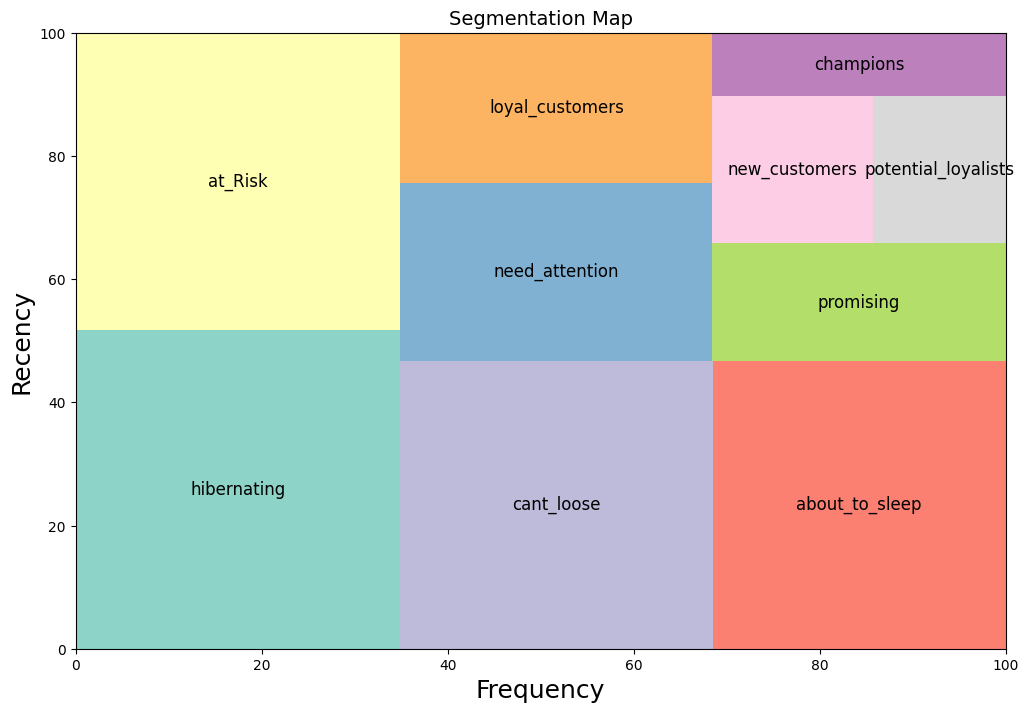

In [21]:
segments = rfm["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)

palette = sns.color_palette("Set3", len(segments))

squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=palette,
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 12},
)

plt.title("Segmentation Map", fontsize=14)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

Check the recency, frequency and monetary averages of the segments.

In [22]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep      113.785  1629     2.401  1629  359.009  1629
at_Risk             241.607  3131     4.472  3131  646.610  3131
cant_loose          235.444  1200    10.698  1200 1474.468  1200
champions            17.107  1932     8.934  1932 1406.625  1932
hibernating         247.950  3604     2.394  3604  366.267  3604
loyal_customers      82.595  3361     8.375  3361 1216.819  3361
need_attention      113.829   823     3.728   823  562.143   823
new_customers        17.918   680     2.000   680  339.956   680
potential_loyalists  37.156  2938     3.304  2938  533.184  2938
promising            58.921   647     2.000   647  335.673   647

FLO is adding a new women's shoe brand to its portfolio. The product prices of the brand it added are above general customer preferences. 

Therefore, it is desired to contact customers with profiles that will be interested in the promotion of the brand and product sales. 

Loyal customers (champions, loyal_customers, those who shop from the women's category and have an average value of 250 TL are the customers to be contacted specifically. 

Save the id numbers of these customers to the csv file.

In [23]:
target_segments_customer_ids = rfm[rfm["segment"].isin(["champions","loyal_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) & (df["total_customer_value"]/df["total_order_num"] > 250)&(df["interested_in_categories_12"].str.contains("KADIN"))]["master_id"]
#cust_ids.to_csv("yeni_marka_hedef_müşteri_id.csv", index=False)
cust_ids.shape

(148,)

A discount of nearly 40% is planned for Men's and Children's products. The target customers include those who have been valuable in the past but have not shopped for a long time, customers who should not be lost, dormant customers, and new customers who are interested in the relevant discount categories. Save the IDs of customers matching this profile to a CSV file.

In [24]:
target_segments_customer_ids = rfm[rfm["segment"].isin(["champions","loyal_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) & ((df["interested_in_categories_12"].str.contains("ERKEK")) | (df["interested_in_categories_12"].str.contains("COCUK")))]["master_id"]
#cust_ids.to_csv("indirim_hedef_müşteri_ids.csv", index=False)
cust_ids.shape

(3563,)